Dataset extracted to: dataset
Found 9469 images belonging to 10 classes.
Found 3925 images belonging to 10 classes.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 47s 158ms/step - accuracy: 0.2649 - loss: 2.0698 - val_accuracy: 0.5200 - val_loss: 1.4509
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 45s 153ms/step - accuracy: 0.5129 - loss: 1.4691 - val_accuracy: 0.5557 - val_loss: 1.3651
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 48s 161ms/step - accuracy: 0.5762 - loss: 1.2887 - val_accuracy: 0.5944 - val_loss: 1.2735
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 46s 154ms/step - accuracy: 0.6121 - loss: 1.1712 - val_accuracy: 0.6237 - val_loss: 1.1722
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 45s 153ms/step - accuracy: 0.6344 - loss: 1.0916 - val_accuracy: 0.6512 - val_loss: 1.0892
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 46s 156ms/step - accuracy: 0.6602 - loss: 1.0284 - val_accuracy: 0.6489 - val_loss: 1.0820
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 46s 154ms/step - accuracy: 0.6824 - loss: 0.9707 - val_accuracy: 0.6413 - val_loss: 1.1098
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 47s 158ms/step - accuracy: 0.7018 - loss: 0

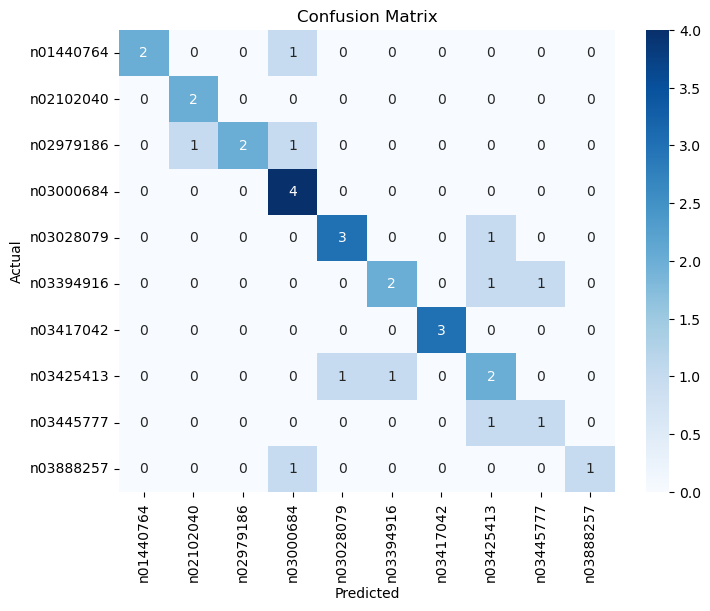

In [4]:
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Extract the ZIP File
zip_path = "dataset.zip"
extract_path = "dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Dataset extracted to: {extract_path}")

# Step 2: Define Dataset Paths
dataset_path = os.path.join(extract_path, "imageset", "train")
val_path = os.path.join(extract_path, "imageset", "val")

# Step 3: Define Image Data Generators (Reduced Augmentation)
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Less rotation
    horizontal_flip=True,  # Only flipping
)

train_generator = datagen.flow_from_directory(
    dataset_path, 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='sparse'
)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path, 
    target_size=(64, 64), 
    batch_size=32, 
    class_mode='sparse'
)

# Step 4: Define CNN Model (Optimized)
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),  # Reduced layers
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Reduced dropout to prevent slowdowns
    layers.Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train Model (Restored to 10 Epochs)
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Step 6: Evaluate Model
val_images, val_labels = next(val_generator)
y_pred_probs = model.predict(val_images)
y_pred = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(val_labels, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.2f}")

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(val_labels, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=train_generator.class_indices.keys(), 
            yticklabels=train_generator.class_indices.keys())

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
